# Convex hull

## Function convex hull

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def convex_hull(x, y):
    # 関数f(x, y)のconvex hullを計算する。(y_i = f(x_i))
    # x座標とy座標を入力すると、convex hullのx座標の添字i(x_i)と傾き（その点と一つ前の点で作る傾き）をreturnする。
    
    l = [(0, -np.inf)]                #np.inf = ∞,  l = [(添字（一番左の点）(x_0)、傾き-∞)]
    
    for i, (nx, ny) in enumerate(zip(x[1:],y[1:])):      #nx:x_i(x座標)Now x, ny:y_i(y座標), zip:(リストやタプルなど）の要素を同時に取得（x,yを同時に取得）
                                                         
                                                         #凸関数の場合、2点でできる傾きは単調増加
        while True:
            pi, pv = l[-1]                               #pi:一つ前の(Previous)「点の添字番号（左から数えた点の番号(x_i)）」pv: 一つ前の「現在の点と前の点で作る直線の傾きv」
            v = (ny - y[pi]) / (nx - x[pi])              #v:現在の点と一つ前の点で作った直線の傾き
            #print('v = ', v)
            if v <= pv:                                  #傾きが一つ前の傾きより小さかったら
                del l[-1]                                #一つ前の点（添字、傾き）を消す
                #print(l)
            else:                                        #傾きがひとつ前の傾きより大きい
                l.append((i+1, v))                       #点の情報（添字、傾き）をlに追加する
                #print(l)
                break
        
    return [j for j, _ in l], [v for _, v in l[1:]]      #lは一つの組に2つ要素。j, _という名前でとってくるが、jのみ返す。vも同様.

## Check program behavior

### Example. 1

In [3]:
print(convex_hull([1, 2, 3, 4, 5], [0, 1, -2, 1, 0]))      #([0, 2, 4], [-1.0, 1.0])

([0, 2, 4], [-1.0, 1.0])


[1 3 5] [ 0 -2  0]


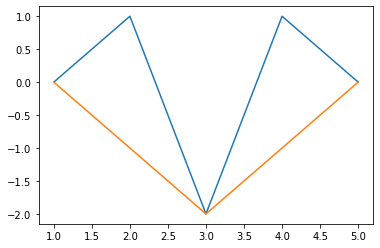

In [4]:
x = [1, 2, 3, 4, 5]
y = [0, 1, -2, 1, 0]

plt.plot(x, y)
    
x = np.array(x)
y = np.array(y)
j, _ = convex_hull(x, y)
print(x[j], y[j])
plt.plot(x[j], y[j])
plt.show()

### Example. 2

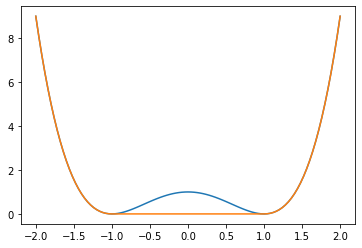

In [5]:
x = np.linspace(-2, 2, 101)                          #[-2,2]を100等分(-2,…,2), numpy.linspace(最初の値,最後の値,要素数)
y = (x - 1)**2 * (x + 1)**2

plt.plot(x, y)

j, _ = convex_hull(x, y)              #xだけ取得
plt.plot(x[j], y[j])
plt.show()

### Example.  3

convex hullのグラフで、$x = 10$付近で挙動がおかしくなっているように見えるが、sinの関数と同じになっているだけである。

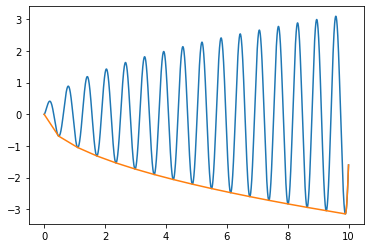

In [6]:
x = np.linspace(0, 10, 10000)
y = np.sin(10 * x) * x**0.5

plt.plot(x, y)

j, _ = convex_hull(x, y)
plt.plot(x[j], y[j])
plt.show()

### Example. 4

$f(x) = -e ^ {-x^2}$, $x \in \mathbb{R}$ 

離散化した$f$を$f_d$とする。
$
f_d(x) = y = \left\{
\begin{array}{ll}
-e ^ {-x^2} & (x \in [-n, n], x = hk, k \in \mathbb{R})\\
+\infty & others
\end{array}
\right.
$
,  

$
conv(f_d(x)) = \left\{
\begin{array}{ll}
conv(- e ^ {-x^2}) & (x \in [-n, n])\\
+\infty & others
\end{array}
\right.
$

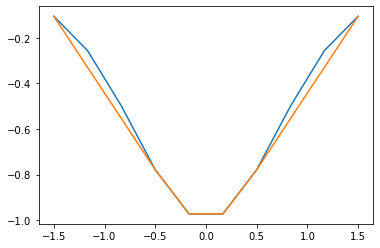

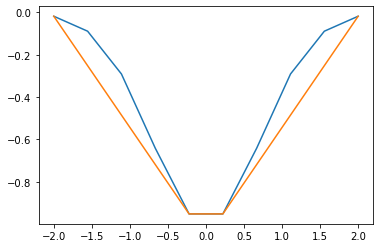

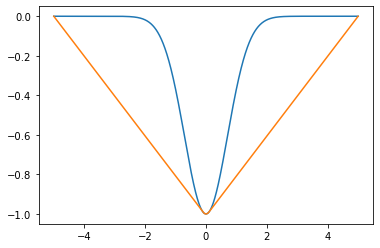

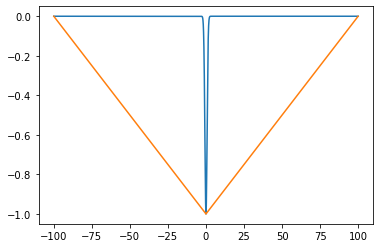

In [7]:
x = np.linspace(-1.5, 1.5, 10)
y = -math.e**(-x**2)

plt.plot(x, y)
    
j, _ = convex_hull(x, y)
plt.plot(x[j], y[j])
plt.show()
    
x = np.linspace(-2, 2, 10)
y = -math.e**(-x**2)
    
plt.plot(x, y)
    
j, _ = convex_hull(x, y)
plt.plot(x[j], y[j])
plt.show()
    
x = np.linspace(-5, 5, 100000)
y = -math.e**(-x**2)

plt.plot(x, y)
j, _ = convex_hull(x, y)
    
plt.plot(x[j], y[j])
plt.show()
    
x = np.linspace(-100, 100, 100000)
y = -math.e**(-x**2)

plt.plot(x, y)
    
j, _ = convex_hull(x, y)
plt.plot(x[j], y[j])
plt.show()

$f(x) = y = -e ^ {-x^2}$, $x \in \mathbb{R}$
の凸包は、
$conv f(x) = \{y = -1\}$
である。

しかし、離散化した上記のプログラムの場合、$dom f = \{x \in [-n, n]\}$
であることから、離散化した$f$を$f_d$とすると、
$conv f \neq conv f_d$である。